In [2]:
from sentinelsat import SentinelAPI

f = open("../../sentinel_heslo.txt",'r').read().splitlines()
user = f[0] 
password = f[1]

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [3]:
import geopandas as gpd
import folium 

# nReserve = gpd.read_file('NReserve/NaturalReserve_Polygon.shp')
world = gpd.read_file('C:/Users/zfilk/Documents/Python Scripts/sentinel/data/WB_countries_Admin0_10m.shp')
nReserve = world[world['ISO_A2']=="SK"]
m = folium.Map([48.14816, 17.10674], zoom_start=12)
folium.GeoJson(nReserve).add_to(m)
m

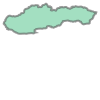

In [4]:
from shapely.geometry import MultiPolygon, Polygon

footprint = None
for i in nReserve['geometry']:
    footprint = i
    
footprint

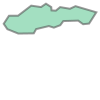

In [5]:
from shapely.geometry import MultiPolygon, Polygon

footprint = None
for i in nReserve['geometry'].simplify(0.1):
    footprint = i
    
footprint

In [16]:
products = api.query(footprint,
                     date = ('20220601', '20220626'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0,10)
                    )

In [17]:
products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted

,title,link,link_alternative,link_icon,summary,ondemand,generationdate,beginposition,endposition,ingestiondate,...,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid,geometry
570380fd-5705-4a1f-ae14-18532c63e944,S2B_MSIL2A_20220620T093039_N0400_R136_T34UFV_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-06-20T09:30:39.024Z, Instrument: MS...",false,2022-06-20 11:11:35,2022-06-20 09:30:39.024,2022-06-20 09:30:39.024,2022-06-20 14:39:36.195,...,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_2BPS_20220620T111135_S2022...,S2B_OPER_MSI_L2A_TL_2BPS_20220620T111135_A0276...,S2B_MSIL2A_20220620T093039_N0400_R136_T34UFV_2...,570380fd-5705-4a1f-ae14-18532c63e944,"MULTIPOLYGON (((23.84748 48.62982, 23.90457 49..."
c8d748bc-6be8-48e7-9341-1c4ac9745028,S2B_MSIL2A_20220620T093039_N0400_R136_T34UFU_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-06-20T09:30:39.024Z, Instrument: MS...",false,2022-06-20 11:11:35,2022-06-20 09:30:39.024,2022-06-20 09:30:39.024,2022-06-20 14:32:34.008,...,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_2BPS_20220620T111135_S2022...,S2B_OPER_MSI_L2A_TL_2BPS_20220620T111135_A0276...,S2B_MSIL2A_20220620T093039_N0400_R136_T34UFU_2...,c8d748bc-6be8-48e7-9341-1c4ac9745028,"MULTIPOLYGON (((23.79809 47.73104, 23.85244 48..."
9678292a-fe41-4ba8-b0f9-9022444d8d6c,S2B_MSIL2A_20220620T093039_N0400_R136_T34UEU_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-06-20T09:30:39.024Z, Instrument: MS...",false,2022-06-20 11:11:35,2022-06-20 09:30:39.024,2022-06-20 09:30:39.024,2022-06-20 14:26:48.772,...,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_2BPS_20220620T111135_S2022...,S2B_OPER_MSI_L2A_TL_2BPS_20220620T111135_A0276...,S2B_MSIL2A_20220620T093039_N0400_R136_T34UEU_2...,9678292a-fe41-4ba8-b0f9-9022444d8d6c,"MULTIPOLYGON (((22.46479 47.75582, 22.49327 48..."
5e8b8920-3018-47c5-9f40-110da54c4034,S2B_MSIL2A_20220620T093039_N0400_R136_T34UEV_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-06-20T09:30:39.024Z, Instrument: MS...",false,2022-06-20 11:11:35,2022-06-20 09:30:39.024,2022-06-20 09:30:39.024,2022-06-20 14:45:38.498,...,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_2BPS_20220620T111135_S2022...,S2B_OPER_MSI_L2A_TL_2BPS_20220620T111135_A0276...,S2B_MSIL2A_20220620T093039_N0400_R136_T34UEV_2...,5e8b8920-3018-47c5-9f40-110da54c4034,"MULTIPOLYGON (((22.49067 48.65539, 22.52060 49..."
a9d876f6-9269-4f4a-b956-2657499595ab,S2B_MSIL2A_20220619T100029_N0400_R122_T33UXQ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-06-19T10:00:29.024Z, Instrument: MS...",false,2022-06-19 11:43:29,2022-06-19 10:00:29.024,2022-06-19 10:00:29.024,2022-06-19 15:56:04.538,...,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_2BPS_20220619T114329_S2022...,S2B_OPER_MSI_L2A_TL_2BPS_20220619T114329_A0276...,S2B_MSIL2A_20220619T100029_N0400_R122_T33UXQ_2...,a9d876f6-9269-4f4a-b956-2657499595ab,"MULTIPOLYGON (((17.58000 48.63471, 17.59178 48..."
2b7d772f-3539-4732-809b-a402a86059f0,S2B_MSIL2A_20220620T093039_N0400_R136_T34UDU_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-06-20T09:30:39.024Z, Instrument: MS...",false,2022-06-20 11:11:35,2022-06-20 09:30:39.

In [18]:
api.download("167524ba-c57b-4de5-9342-a823ea374062")

MD5 checksumming:   0%|          | 0.00/1.19G [00:00<?, ?B/s]

{'id': '167524ba-c57b-4de5-9342-a823ea374062',
 'title': 'S2A_MSIL2A_20220611T095041_N0400_R079_T33UYQ_20220611T143810',
 'size': 1188858470,
 'md5': '8a279d28a6c1be52ee6c64289c767b92',
 'date': datetime.datetime(2022, 6, 11, 9, 50, 41, 24000),
 'footprint': 'POLYGON((17.768514805040418 49.61961011420237,19.285045642978584 49.57334356268714,19.20098061857843 48.5883487810417,17.714086657742417 48.63304460468163,17.768514805040418 49.61961011420237))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('167524ba-c57b-4de5-9342-a823ea374062')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2022, 6, 11, 17, 28, 3, 674000),
 'Ingestion Date': datetime.datetime(2022, 6, 11, 17, 27, 40, 406000),
 'quicklook_url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('167524ba-c57b-4de5-9342-a823ea374062')/Products('Quicklook')/$value",
 'path': 'S2A_MSIL2A_20220611T095041_N0400_R079_T33UYQ_20220611T143810.zip',
 'downloaded_bytes': 1188858470}

In [21]:
import rasterio as rio
# Open Bands 4, 3 and 2 with Rasterio
R10 = '../../sentinel_data/S2A_MSIL2A_20220611T095041_N0400_R079_T33UYQ_20220611T143810'
b4 = rio.open(R10+'/T33UYQ_20220611T095041_B04_10m.jp2')
b3 = rio.open(R10+'/T33UYQ_20220611T095041_B03_10m.jp2')
b2 = rio.open(R10+'/T33UYQ_20220611T095041_B02_10m.jp2')


# Create an RGB image 
with rio.open('RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b4.read(1),3) 
    rgb.close()

In [20]:
nReserve_proj = nReserve.to_crs({'init': 'epsg:32633'})

with rio.open("RGB.tiff") as src:
    out_image, out_transform = rio.mask(src, nReserve_proj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rasterio.open("RGB_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

C:\Users\zfilk\anaconda3\envs\satellite\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


AttributeError: module 'rasterio' has no attribute 'mask'